## Entraînement des Modèles de Classification de CV

### 1. Importation des bibliothèques

In [17]:
# Manipulation de données
import pandas as pd
import numpy as np
import joblib

# Machine Learning - Modèles
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Évaluation des modèles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Gestion du temps
import time

# Gestion des warnings
import warnings
warnings.filterwarnings('ignore')

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


### 2. Chargement des données prétraitées

In [18]:
# Charger les données prétraitées depuis l'étape précédente
print(" Chargement des données prétraitées...")

# Charger les ensembles Train/Test
preprocessing_data = joblib.load('../models/preprocessing_data.joblib')

# Extraire les données pour chaque modèle
# Modèle 1 : Domaine
X_train_domain = preprocessing_data['X_train_domain']
X_test_domain = preprocessing_data['X_test_domain']
y_train_domain = preprocessing_data['y_train_domain']
y_test_domain = preprocessing_data['y_test_domain']

# Modèle 2 : Expérience
X_train_exp = preprocessing_data['X_train_exp']
X_test_exp = preprocessing_data['X_test_exp']
y_train_exp = preprocessing_data['y_train_exp']
y_test_exp = preprocessing_data['y_test_exp']

# Modèle 3 : Compétences
X_train_skills = preprocessing_data['X_train_skills']
X_test_skills = preprocessing_data['X_test_skills']
y_train_skills = preprocessing_data['y_train_skills']
y_test_skills = preprocessing_data['y_test_skills']

print("Données chargées avec succès !")
print("\n" + "=" * 80)
print("RÉSUMÉ DES DONNÉES")
print("=" * 80)
print(f"\n DOMAINE :")
print(f"   - Train : {X_train_domain.shape[0]} CV, {X_train_domain.shape[1]} features")
print(f"   - Test  : {X_test_domain.shape[0]} CV")
print(f"   - Classes : {len(np.unique(y_train_domain))}")

print(f"\n EXPÉRIENCE :")
print(f"   - Train : {X_train_exp.shape[0]} CV, {X_train_exp.shape[1]} features")
print(f"   - Test  : {X_test_exp.shape[0]} CV")
print(f"   - Classes : {len(np.unique(y_train_exp))}")

print(f"\n COMPÉTENCES :")
print(f"   - Train : {X_train_skills.shape[0]} CV, {X_train_skills.shape[1]} features")
print(f"   - Test  : {X_test_skills.shape[0]} CV")
print(f"   - Classes : {len(np.unique(y_train_skills))}")

 Chargement des données prétraitées...
Données chargées avec succès !

RÉSUMÉ DES DONNÉES

 DOMAINE :
   - Train : 7635 CV, 5000 features
   - Test  : 1909 CV
   - Classes : 9

 EXPÉRIENCE :
   - Train : 7635 CV, 5000 features
   - Test  : 1909 CV
   - Classes : 5

 COMPÉTENCES :
   - Train : 7635 CV, 5000 features
   - Test  : 1909 CV
   - Classes : 137


### 3. Définition des modèles à entraîner

In [19]:
# Définir plusieurs modèles de classification pour comparer les performances

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Linear SVC': LinearSVC(max_iter=1000, random_state=42)
}

print("Modèles définis :")
print("=" * 80)
for name, model in models.items():
    print(f"   ✓ {name}")
print("\nNous allons entraîner ces 4 modèles pour chaque tâche de classification")

Modèles définis :
   ✓ Naive Bayes
   ✓ Logistic Regression
   ✓ Random Forest
   ✓ Linear SVC

Nous allons entraîner ces 4 modèles pour chaque tâche de classification


### 4. Entraînement des modèles - Classification du Domaine

In [22]:
print("=" * 80)
print("ENTRAÎNEMENT DES MODÈLES - CLASSIFICATION DU DOMAINE PROFESSIONNEL")
print("=" * 80)

# Dictionnaire pour stocker les modèles entraînés et leurs performances
domain_models = {}
domain_results = []

for model_name, model in models.items():
    print(f"\nEntraînement : {model_name}...")
    
    # Mesurer le temps d'entraînement
    start_time = time.time()
    
    # Entraîner le modèle
    model.fit(X_train_domain, y_train_domain)
    
    # Temps d'entraînement
    training_time = time.time() - start_time
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_domain)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test_domain, y_pred)
    precision = precision_score(y_test_domain, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_domain, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_domain, y_pred, average='weighted', zero_division=0)
    
    # Stocker les résultats
    domain_results.append({
        'Modèle': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Temps (s)': training_time
    })
    
    # Stocker le modèle entraîné
    domain_models[model_name] = model
    
    print(f"    Accuracy  : {accuracy:.4f}")
    print(f"    Precision : {precision:.4f}")
    print(f"    Recall    : {recall:.4f}")
    print(f"    F1-Score  : {f1:.4f}")
    print(f"    Temps     : {training_time:.2f}s")

# Créer un DataFrame avec les résultats
domain_results_df = pd.DataFrame(domain_results)

print("\n" + "=" * 80)
print("RÉSUMÉ DES PERFORMANCES - DOMAINE")
print("=" * 80)
print(domain_results_df.to_string(index=False))

# Identifier le meilleur modèle
best_model_name = domain_results_df.loc[domain_results_df['F1-Score'].idxmax(), 'Modèle']
print(f"\nMeilleur modèle : {best_model_name}")

ENTRAÎNEMENT DES MODÈLES - CLASSIFICATION DU DOMAINE PROFESSIONNEL

Entraînement : Naive Bayes...
    Accuracy  : 0.9633
    Precision : 0.9504
    Recall    : 0.9633
    F1-Score  : 0.9561
    Temps     : 0.03s

Entraînement : Logistic Regression...
    Accuracy  : 0.9822
    Precision : 0.9779
    Recall    : 0.9822
    F1-Score  : 0.9780
    Temps     : 0.75s

Entraînement : Random Forest...
    Accuracy  : 0.9722
    Precision : 0.9640
    Recall    : 0.9722
    F1-Score  : 0.9673
    Temps     : 2.31s

Entraînement : Linear SVC...
    Accuracy  : 0.9958
    Precision : 0.9922
    Recall    : 0.9958
    F1-Score  : 0.9939
    Temps     : 1.18s

RÉSUMÉ DES PERFORMANCES - DOMAINE
             Modèle  Accuracy  Precision   Recall  F1-Score  Temps (s)
        Naive Bayes  0.963332   0.950382 0.963332  0.956084   0.028235
Logistic Regression  0.982190   0.977851 0.982190  0.978041   0.749511
      Random Forest  0.972237   0.964036 0.972237  0.967274   2.311350
         Linear SVC  0.99

### 5. Entraînement des modèles - Classification de l'Expérience

In [23]:
print("=" * 80)
print("ENTRAÎNEMENT DES MODÈLES - CLASSIFICATION DU NIVEAU D'EXPÉRIENCE")
print("=" * 80)

# Dictionnaire pour stocker les modèles entraînés et leurs performances
exp_models = {}
exp_results = []

for model_name, model in models.items():
    print(f"\nEntraînement : {model_name}...")
    
    # Créer une nouvelle instance du modèle (pour éviter les conflits)
    if model_name == 'Naive Bayes':
        model = MultinomialNB()
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    elif model_name == 'Linear SVC':
        model = LinearSVC(max_iter=1000, random_state=42)
    
    # Mesurer le temps d'entraînement
    start_time = time.time()
    
    # Entraîner le modèle
    model.fit(X_train_exp, y_train_exp)
    
    # Temps d'entraînement
    training_time = time.time() - start_time
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_exp)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test_exp, y_pred)
    precision = precision_score(y_test_exp, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_exp, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_exp, y_pred, average='weighted', zero_division=0)
    
    # Stocker les résultats
    exp_results.append({
        'Modèle': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Temps (s)': training_time
    })
    
    # Stocker le modèle entraîné
    exp_models[model_name] = model
    
    print(f"    Accuracy  : {accuracy:.4f}")
    print(f"    Precision : {precision:.4f}")
    print(f"    Recall    : {recall:.4f}")
    print(f"    F1-Score  : {f1:.4f}")
    print(f"    Temps     : {training_time:.2f}s")

# Créer un DataFrame avec les résultats
exp_results_df = pd.DataFrame(exp_results)

print("\n" + "=" * 80)
print("RÉSUMÉ DES PERFORMANCES - EXPÉRIENCE")
print("=" * 80)
print(exp_results_df.to_string(index=False))

# Identifier le meilleur modèle
best_model_name = exp_results_df.loc[exp_results_df['F1-Score'].idxmax(), 'Modèle']
print(f"\nMeilleur modèle : {best_model_name}")

ENTRAÎNEMENT DES MODÈLES - CLASSIFICATION DU NIVEAU D'EXPÉRIENCE

Entraînement : Naive Bayes...
    Accuracy  : 0.6595
    Precision : 0.7573
    Recall    : 0.6595
    F1-Score  : 0.6453
    Temps     : 0.02s

Entraînement : Logistic Regression...
    Accuracy  : 0.9916
    Precision : 0.9916
    Recall    : 0.9916
    F1-Score  : 0.9916
    Temps     : 1.89s

Entraînement : Random Forest...
    Accuracy  : 0.9471
    Precision : 0.9481
    Recall    : 0.9471
    F1-Score  : 0.9472
    Temps     : 5.19s

Entraînement : Linear SVC...
    Accuracy  : 0.9974
    Precision : 0.9974
    Recall    : 0.9974
    F1-Score  : 0.9974
    Temps     : 2.09s

RÉSUMÉ DES PERFORMANCES - EXPÉRIENCE
             Modèle  Accuracy  Precision   Recall  F1-Score  Temps (s)
        Naive Bayes  0.659508   0.757327 0.659508  0.645338   0.024206
Logistic Regression  0.991619   0.991611 0.991619  0.991608   1.890530
      Random Forest  0.947093   0.948137 0.947093  0.947199   5.190141
         Linear SVC  0.9

### 6. Entraînement des modèles - Classification des Compétences

In [24]:
print("=" * 80)
print("ENTRAÎNEMENT DES MODÈLES - CLASSIFICATION DES COMPÉTENCES PRINCIPALES")
print("=" * 80)

# Dictionnaire pour stocker les modèles entraînés et leurs performances
skills_models = {}
skills_results = []

for model_name, model in models.items():
    print(f"\nEntraînement : {model_name}...")
    
    # Créer une nouvelle instance du modèle
    if model_name == 'Naive Bayes':
        model = MultinomialNB()
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    elif model_name == 'Linear SVC':
        model = LinearSVC(max_iter=1000, random_state=42)
    
    # Mesurer le temps d'entraînement
    start_time = time.time()
    
    # Entraîner le modèle
    model.fit(X_train_skills, y_train_skills)
    
    # Temps d'entraînement
    training_time = time.time() - start_time
    
    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_skills)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test_skills, y_pred)
    precision = precision_score(y_test_skills, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_skills, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_skills, y_pred, average='weighted', zero_division=0)
    
    # Stocker les résultats
    skills_results.append({
        'Modèle': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Temps (s)': training_time
    })
    
    # Stocker le modèle entraîné
    skills_models[model_name] = model
    
    print(f"    Accuracy  : {accuracy:.4f}")
    print(f"    Precision : {precision:.4f}")
    print(f"    Recall    : {recall:.4f}")
    print(f"    F1-Score  : {f1:.4f}")
    print(f"    Temps     : {training_time:.2f}s")

# Créer un DataFrame avec les résultats
skills_results_df = pd.DataFrame(skills_results)

print("\n" + "=" * 80)
print("RÉSUMÉ DES PERFORMANCES - COMPÉTENCES")
print("=" * 80)
print(skills_results_df.to_string(index=False))

# Identifier le meilleur modèle
best_model_name = skills_results_df.loc[skills_results_df['F1-Score'].idxmax(), 'Modèle']
print(f"\nMeilleur modèle : {best_model_name}")

ENTRAÎNEMENT DES MODÈLES - CLASSIFICATION DES COMPÉTENCES PRINCIPALES

Entraînement : Naive Bayes...
    Accuracy  : 0.3677
    Precision : 0.3447
    Recall    : 0.3677
    F1-Score  : 0.2872
    Temps     : 0.29s

Entraînement : Logistic Regression...
    Accuracy  : 0.6422
    Precision : 0.6731
    Recall    : 0.6422
    F1-Score  : 0.5992
    Temps     : 35.67s

Entraînement : Random Forest...
    Accuracy  : 0.7161
    Precision : 0.7159
    Recall    : 0.7161
    F1-Score  : 0.6862
    Temps     : 11.95s

Entraînement : Linear SVC...
    Accuracy  : 0.7973
    Precision : 0.7884
    Recall    : 0.7973
    F1-Score  : 0.7762
    Temps     : 22.36s

RÉSUMÉ DES PERFORMANCES - COMPÉTENCES
             Modèle  Accuracy  Precision   Recall  F1-Score  Temps (s)
        Naive Bayes  0.367732   0.344747 0.367732  0.287188   0.288413
Logistic Regression  0.642221   0.673088 0.642221  0.599218  35.666882
      Random Forest  0.716082   0.715902 0.716082  0.686200  11.954305
         Linear

### 7. Visualisation comparative des performances

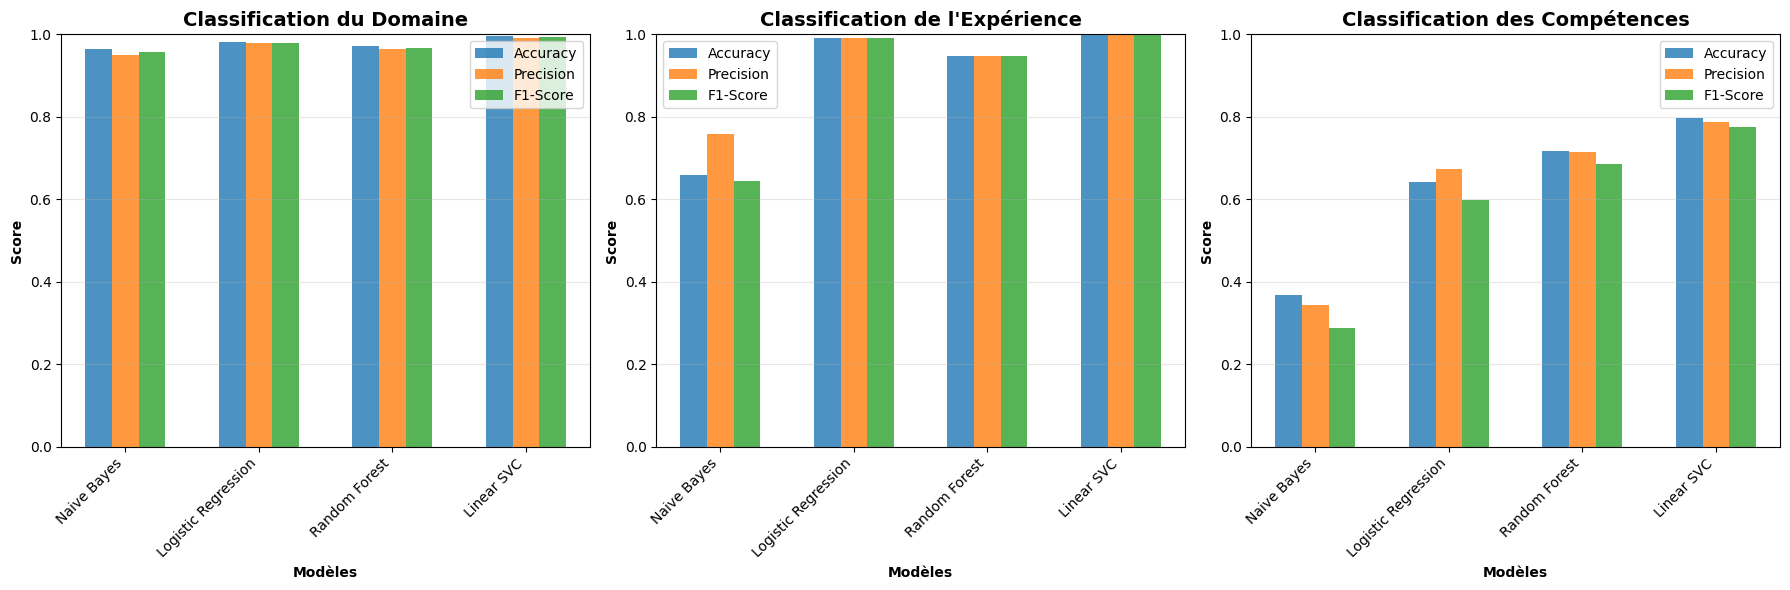

Les graphiques montrent les performances comparatives de chaque modèle


In [26]:
# Visualiser les performances des modèles pour chaque tâche
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ====== DOMAINE ======
ax = axes[0]
x_pos = np.arange(len(domain_results_df))
ax.bar(x_pos - 0.2, domain_results_df['Accuracy'], 0.2, label='Accuracy', alpha=0.8)
ax.bar(x_pos, domain_results_df['Precision'], 0.2, label='Precision', alpha=0.8)
ax.bar(x_pos + 0.2, domain_results_df['F1-Score'], 0.2, label='F1-Score', alpha=0.8)
ax.set_xlabel('Modèles', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Classification du Domaine', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(domain_results_df['Modèle'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# ====== EXPÉRIENCE ======
ax = axes[1]
x_pos = np.arange(len(exp_results_df))
ax.bar(x_pos - 0.2, exp_results_df['Accuracy'], 0.2, label='Accuracy', alpha=0.8)
ax.bar(x_pos, exp_results_df['Precision'], 0.2, label='Precision', alpha=0.8)
ax.bar(x_pos + 0.2, exp_results_df['F1-Score'], 0.2, label='F1-Score', alpha=0.8)
ax.set_xlabel('Modèles', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Classification de l\'Expérience', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(exp_results_df['Modèle'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# ====== COMPÉTENCES ======
ax = axes[2]
x_pos = np.arange(len(skills_results_df))
ax.bar(x_pos - 0.2, skills_results_df['Accuracy'], 0.2, label='Accuracy', alpha=0.8)
ax.bar(x_pos, skills_results_df['Precision'], 0.2, label='Precision', alpha=0.8)
ax.bar(x_pos + 0.2, skills_results_df['F1-Score'], 0.2, label='F1-Score', alpha=0.8)
ax.set_xlabel('Modèles', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Classification des Compétences', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(skills_results_df['Modèle'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("Les graphiques montrent les performances comparatives de chaque modèle")

### 8. Sélection et sauvegarde des meilleurs modèles

In [28]:
# Sélectionner les meilleurs modèles pour chaque tâche
best_domain_model_name = domain_results_df.loc[domain_results_df['F1-Score'].idxmax(), 'Modèle']
best_exp_model_name = exp_results_df.loc[exp_results_df['F1-Score'].idxmax(), 'Modèle']
best_skills_model_name = skills_results_df.loc[skills_results_df['F1-Score'].idxmax(), 'Modèle']

best_domain_model = domain_models[best_domain_model_name]
best_exp_model = exp_models[best_exp_model_name]
best_skills_model = skills_models[best_skills_model_name]

print("=" * 80)
print("MEILLEURS MODÈLES SÉLECTIONNÉS")
print("=" * 80)
print(f"\nClassification du Domaine : {best_domain_model_name}")
print(f"   F1-Score : {domain_results_df.loc[domain_results_df['Modèle'] == best_domain_model_name, 'F1-Score'].values[0]:.4f}")

print(f"\nClassification de l'Expérience : {best_exp_model_name}")
print(f"   F1-Score : {exp_results_df.loc[exp_results_df['Modèle'] == best_exp_model_name, 'F1-Score'].values[0]:.4f}")

print(f"\nClassification des Compétences : {best_skills_model_name}")
print(f"   F1-Score : {skills_results_df.loc[skills_results_df['Modèle'] == best_skills_model_name, 'F1-Score'].values[0]:.4f}")

# Sauvegarder les meilleurs modèles
print("\nSauvegarde des meilleurs modèles...")

joblib.dump(best_domain_model, '../models/classifier_domain.joblib')
print("    Modèle Domaine sauvegardé")

joblib.dump(best_exp_model, '../models/classifier_experience.joblib')
print("    Modèle Expérience sauvegardé")

joblib.dump(best_skills_model, '../models/classifier_skills.joblib')
print("    Modèle Compétences sauvegardé")

print("\nTous les meilleurs modèles ont été sauvegardés dans le dossier 'models/'")

MEILLEURS MODÈLES SÉLECTIONNÉS

Classification du Domaine : Linear SVC
   F1-Score : 0.9939

Classification de l'Expérience : Linear SVC
   F1-Score : 0.9974

Classification des Compétences : Linear SVC
   F1-Score : 0.7762

Sauvegarde des meilleurs modèles...
    Modèle Domaine sauvegardé
    Modèle Expérience sauvegardé
    Modèle Compétences sauvegardé

Tous les meilleurs modèles ont été sauvegardés dans le dossier 'models/'


### 9. Résumé final de l'entraînement

In [16]:
# Afficher un résumé complet de l'entraînement
print("\n" + "=" * 80)
print(" ENTRAÎNEMENT DES MODÈLES TERMINÉ AVEC SUCCÈS !")
print("=" * 80)

print("\n MODÈLES ENTRAÎNÉS :")
print(f"   ✓ 4 algorithmes testés pour chaque tâche")
print(f"   ✓ Total de modèles entraînés : 12")

print("\n MEILLEURS MODÈLES :")
print(f"   1. Domaine       : {best_domain_model_name}")
print(f"   2. Expérience    : {best_exp_model_name}")
print(f"   3. Compétences   : {best_skills_model_name}")

print("\n FICHIERS SAUVEGARDÉS :")
print("   - classifier_domain.joblib")
print("   - classifier_experience.joblib")
print("   - classifier_skills.joblib")

print("\n PERFORMANCES MOYENNES :")
avg_domain_f1 = domain_results_df['F1-Score'].mean()
avg_exp_f1 = exp_results_df['F1-Score'].mean()
avg_skills_f1 = skills_results_df['F1-Score'].mean()

print(f"   - Domaine       : F1-Score moyen = {avg_domain_f1:.4f}")
print(f"   - Expérience    : F1-Score moyen = {avg_exp_f1:.4f}")
print(f"   - Compétences   : F1-Score moyen = {avg_skills_f1:.4f}")

print("\n PROCHAINE ÉTAPE :")
print("   → Notebook 10_evaluate_model.ipynb : Évaluation détaillée des modèles")

print("\n" + "=" * 80)


 ENTRAÎNEMENT DES MODÈLES TERMINÉ AVEC SUCCÈS !

 MODÈLES ENTRAÎNÉS :
   ✓ 4 algorithmes testés pour chaque tâche
   ✓ Total de modèles entraînés : 12

 MEILLEURS MODÈLES :
   1. Domaine       : Linear SVC
   2. Expérience    : Linear SVC
   3. Compétences   : Linear SVC

 FICHIERS SAUVEGARDÉS :
   - classifier_domain.joblib
   - classifier_experience.joblib
   - classifier_skills.joblib

 PERFORMANCES MOYENNES :
   - Domaine       : F1-Score moyen = 0.9738
   - Expérience    : F1-Score moyen = 0.8954
   - Compétences   : F1-Score moyen = 0.5872

 PROCHAINE ÉTAPE :
   → Notebook 10_evaluate_model.ipynb : Évaluation détaillée des modèles

